In [ ]:
from pathlib import Path
import geopandas as gpd

# ===========================================================
# 0) Retrouver la racine du projet depuis src/
# ===========================================================
ROOT = Path.cwd()
if ROOT.name == "src":          
    ROOT = ROOT.parent          

print("ROOT =", ROOT)

DATA = ROOT / "data"
DB   = DATA / "database"

print("Dossier database :", DB)

# ===========================================================
# 1) Lister les fichiers dans data/database
# ===========================================================
print("\n📂 Contenu de data/database :")
for f in DB.iterdir():
    print(" -", f.name)

# ===========================================================
# 2) Exemple : charger les fichiers
#    
# ===========================================================

# --- Tous les Parquet de la base
parquet_files = list(DB.glob("*.parquet"))
print("\nParquet trouvés :", [f.name for f in parquet_files])

if parquet_files:
    df_parquet = pd.read_parquet(parquet_files[0])
    print("\nAperçu du premier parquet :", parquet_files[0].name)
    print(df_parquet.head())

# --- Tous les GeoPackage (.gpkg)
gpkg_files = list(DB.glob("*.gpkg"))
print("\nGeoPackage trouvés :", [f.name for f in gpkg_files])

if gpkg_files:
    gdf_gpkg = gpd.read_file(gpkg_files[0])
    print("\nAperçu du premier GPKG :", gpkg_files[0].name)
    print(gdf_gpkg.head())


ROOT = /Users/larbi/Documents/PROJET-ML-FOR-CLIMATE-RISK
Dossier database : /Users/larbi/Documents/PROJET-ML-FOR-CLIMATE-RISK/data/database

📂 Contenu de data/database :
 - swi_filtre_concat_geo_clean.parquet
 - df_naq.parquet
 - df13.parquet

Parquet trouvés : ['swi_filtre_concat_geo_clean.parquet', 'df_naq.parquet', 'df13.parquet']

Aperçu du premier parquet : swi_filtre_concat_geo_clean.parquet
   LAMBX  LAMBY      DATE  PRENEI  PRELIQ     T   FF    SWI  SSWI_10J    ALEA  \
0    920  24090  20000101     0.0     2.9  10.6  2.5  1.084     1.971  Faible   
1    920  24090  20000102     0.0     1.4  10.4  3.6  1.069     1.916  Faible   
2    920  24090  20000103     0.0     9.1  10.5  6.4  1.063     1.763  Faible   
3    920  24090  20000104     0.0     0.3   9.5  4.7  1.058     1.561  Faible   
4    920  24090  20000105     0.0     6.3   9.7  6.8  1.043     1.313  Faible   

   NIVEAU DPT ARGILES_FROM  dist_argiles_m     COMMUNE DEPARTEMENT REGION  
0     1.0  29      nearest      121.

In [ ]:
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import pandas as pd
from pathlib import Path

sns.set_theme(style="whitegrid")

# ==== ROOT & fichier parquet ====
ROOT = Path.cwd()
if ROOT.name == "src":
    ROOT = ROOT.parent

DATA = ROOT / "data"
DB   = DATA / "database"

PARQUET = DB / "swi_filtre_concat_geo_clean.parquet"
print(PARQUET.exists(), PARQUET)

# ==== Chargement ====
df = pd.read_parquet(PARQUET)
print(df.shape)
df.head()


True /Users/larbi/Documents/PROJET-ML-FOR-CLIMATE-RISK/data/database/swi_filtre_concat_geo_clean.parquet
(62143635, 17)


,LAMBX,LAMBY,DATE,PRENEI,PRELIQ,T,FF,SWI,SSWI_10J,ALEA,NIVEAU,DPT,ARGILES_FROM,dist_argiles_m,COMMUNE,DEPARTEMENT,REGION
0,920,24090,20000101,0.0,2.9,10.6,2.5,1.084,1.971,Faible,1.0,29,nearest,121.004668,Ploumoguer,29,53
1,920,24090,20000102,0.0,1.4,10.4,3.6,1.069,1.916,Faible,1.0,29,nearest,121.004668,Ploumoguer,29,53
2,920,24090,20000103,0.0,9.1,10.5,6.4,1.063,1.763,Faible,1.0,29,nearest,121.004668,Ploumoguer,29,53
3,920,24090,20000104,0.0,0.3,9.5,4.7,1.058,1.561,Faible,1.0,29,nearest,121.004668,Ploumoguer,29,53
4,920,24090,20000105,0.0,6.3,9.7,6.8,1.043,1.313,Faible,1.0,29,nearest,121.004668,Ploumoguer,29,53


In [ ]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

sns.set_theme(style="whitegrid")

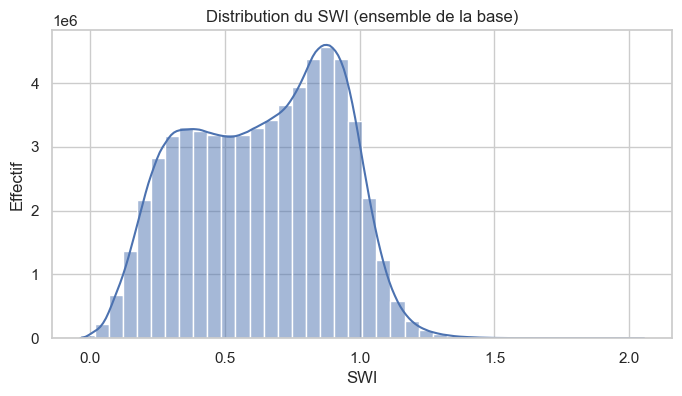

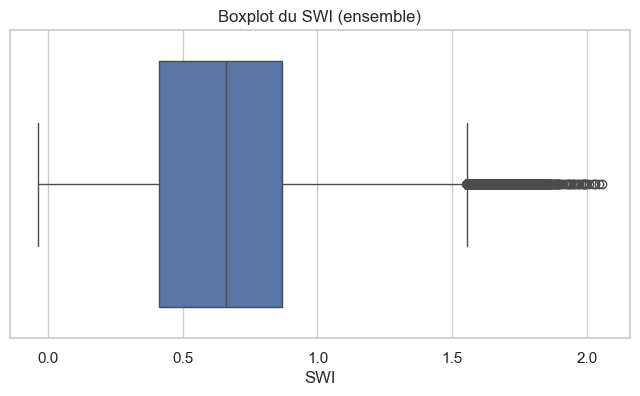

In [4]:
plt.figure(figsize=(8,4))
sns.histplot(df["SWI"], bins=40, kde=True)
plt.title("Distribution du SWI (ensemble de la base)")
plt.xlabel("SWI")
plt.ylabel("Effectif")
plt.show()

plt.figure(figsize=(8,4))
sns.boxplot(x=df["SWI"])
plt.title("Boxplot du SWI (ensemble)")
plt.xlabel("SWI")
plt.show()


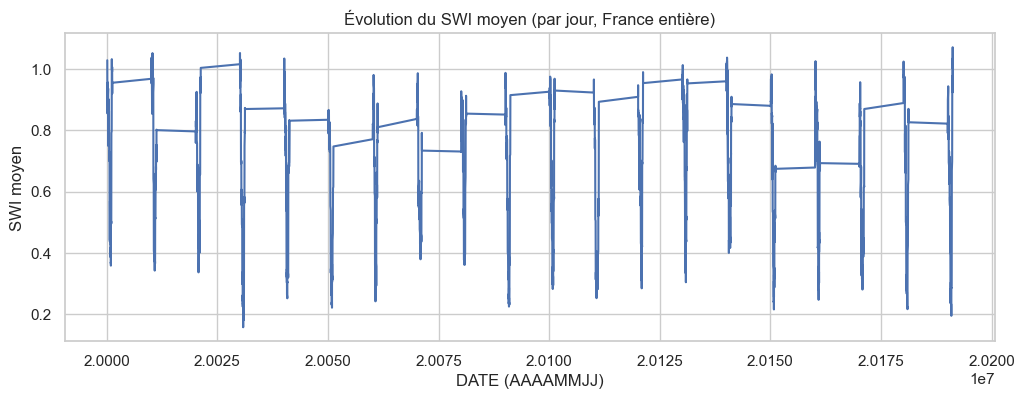

In [5]:
# SWI moyen par jour (DATE = entier AAAAMMJJ)
swi_day = (
    df.groupby("DATE")["SWI"]
      .mean()
      .sort_index()
)

plt.figure(figsize=(12,4))
swi_day.plot()
plt.title("Évolution du SWI moyen (par jour, France entière)")
plt.ylabel("SWI moyen")
plt.xlabel("DATE (AAAAMMJJ)")
plt.show()


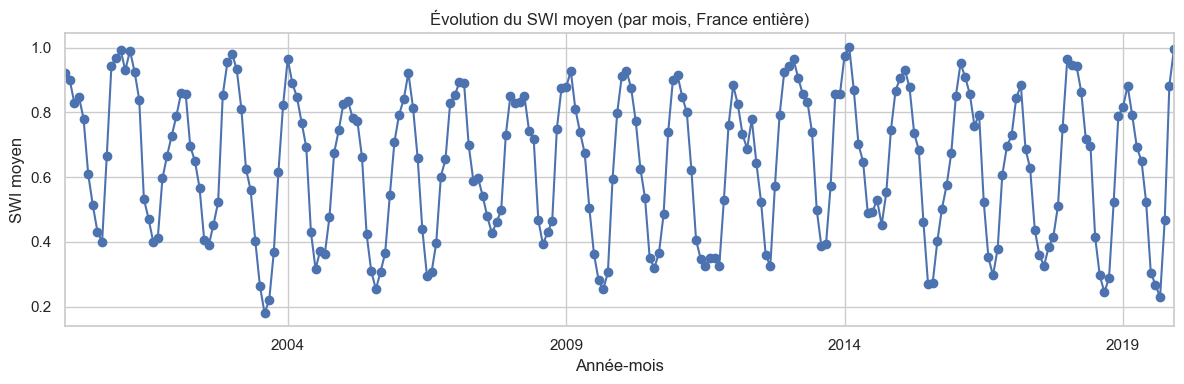

In [ ]:
date_str = df["DATE"].astype(str).str.zfill(8)
year_month = date_str.str.slice(0, 6)  

# SWI moyen par mois
swi_month = df.groupby(year_month)["SWI"].mean().sort_index()

idx_month = pd.to_datetime(swi_month.index + "01", format="%Y%m%d")
swi_month.index = idx_month

plt.figure(figsize=(12,4))
swi_month.plot(marker="o")
plt.title("Évolution du SWI moyen (par mois, France entière)")
plt.ylabel("SWI moyen")
plt.xlabel("Année-mois")
plt.tight_layout()
plt.show()


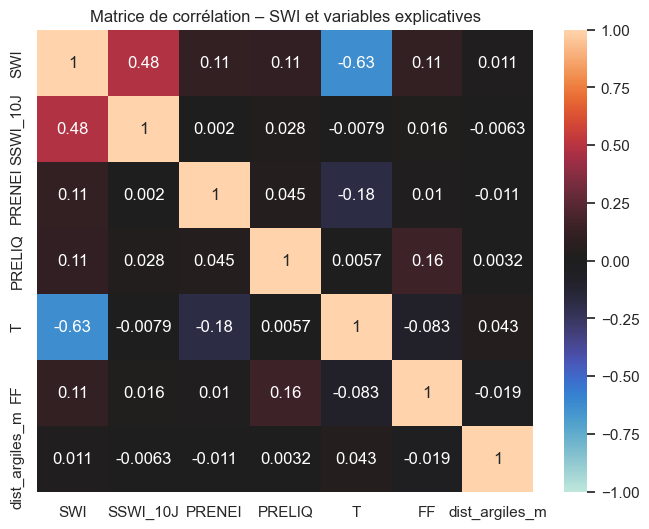

SWI               1.000000
SSWI_10J          0.479753
PRENEI            0.114041
FF                0.110789
PRELIQ            0.106337
dist_argiles_m    0.011369
T                -0.628815
Name: SWI, dtype: float64

In [7]:
num_cols = [
    "SWI", "SSWI_10J",
    "PRENEI", "PRELIQ",
    "T", "FF",
    "dist_argiles_m"
]
num_cols = [c for c in num_cols if c in df.columns]

corr = df[num_cols].corr()

plt.figure(figsize=(8,6))
sns.heatmap(corr, annot=True, vmin=-1, vmax=1, center=0)
plt.title("Matrice de corrélation – SWI et variables explicatives")
plt.show()

# Pour voir rapidement les variables les plus liées au SWI :
corr["SWI"].sort_values(ascending=False)


In [8]:
swi_region_stats = (
    df.groupby("REGION")["SWI"]
      .agg(["mean", "median", "std", "count"])
      .sort_values("mean", ascending=False)
)

swi_region_stats.head(15)


,mean,median,std,count
REGION,,,,
27,0.709824,0.755,0.264813,5486055
84,0.703273,0.748,0.261210,8042805
44,0.682741,0.700,0.260060,6523365
28,0.642681,0.667,0.267269,3374910
75,0.641253,0.659,0.278112,9679125
32,0.638791,0.646,0.239399,3594060
53,0.622138,0.643,0.281585,2980440
76,0.603836,0.605,0.276951,8320395
24,0.603649,0.616,0.255624,4507185


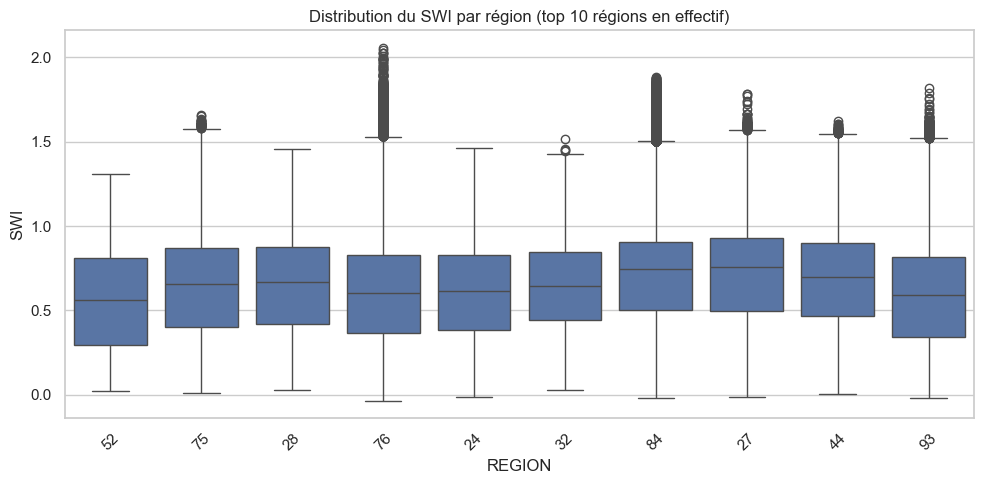

In [9]:
top_regions = df["REGION"].value_counts().head(10).index
df_top_reg = df[df["REGION"].isin(top_regions)]

plt.figure(figsize=(10,5))
sns.boxplot(data=df_top_reg, x="REGION", y="SWI")
plt.title("Distribution du SWI par région (top 10 régions en effectif)")
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()


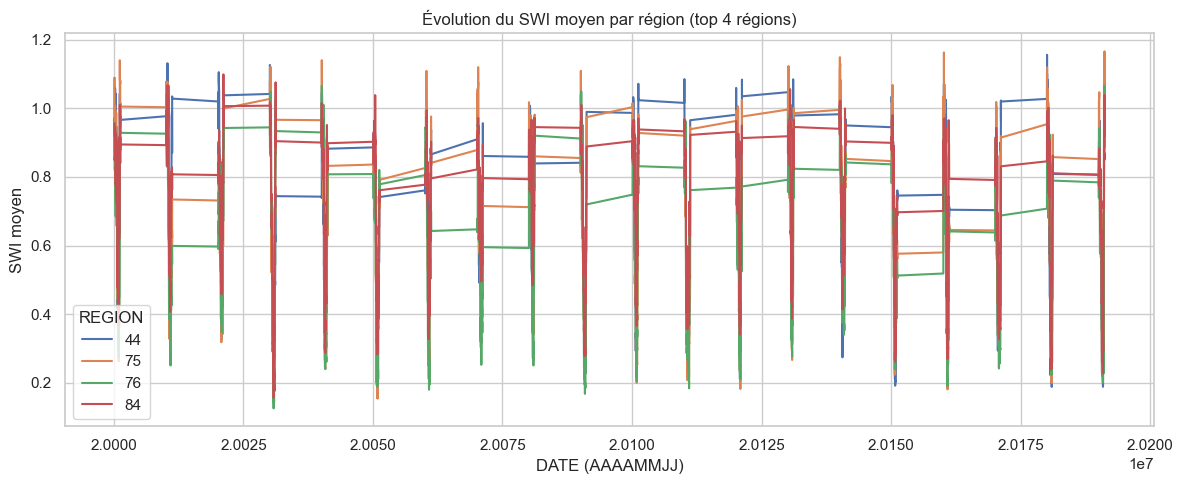

In [10]:
regions_focus = df["REGION"].value_counts().head(4).index

swi_ts_region = (
    df[df["REGION"].isin(regions_focus)]
      .groupby(["DATE","REGION"])["SWI"].mean()
      .reset_index()
)

plt.figure(figsize=(12,5))
sns.lineplot(data=swi_ts_region, x="DATE", y="SWI", hue="REGION")
plt.title("Évolution du SWI moyen par région (top 4 régions)")
plt.ylabel("SWI moyen")
plt.xlabel("DATE (AAAAMMJJ)")
plt.tight_layout()
plt.show()


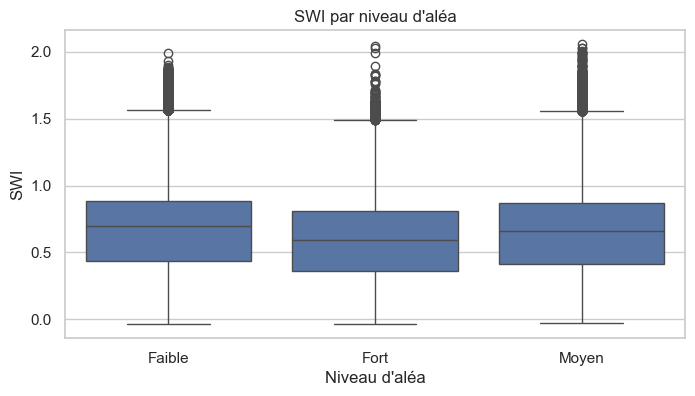

In [11]:
if "ALEA" in df.columns:
    plt.figure(figsize=(8,4))
    sns.boxplot(data=df, x="ALEA", y="SWI",
                order=sorted(df["ALEA"].dropna().unique()))
    plt.title("SWI par niveau d'aléa")
    plt.xlabel("Niveau d'aléa")
    plt.ylabel("SWI")
    plt.show()

    df.groupby("ALEA")["SWI"].describe()


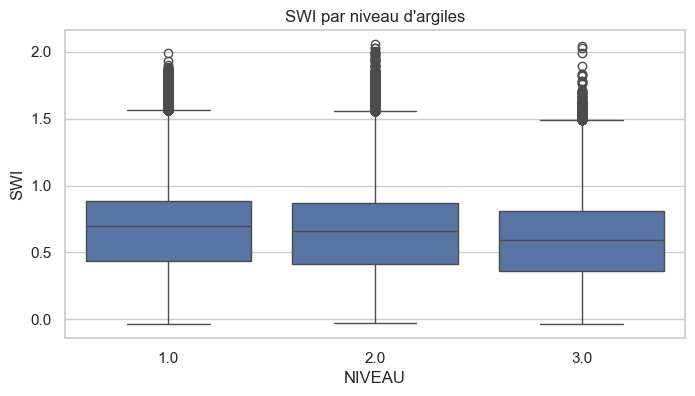

In [ ]:
if "NIVEAU" in df.columns:
    plt.figure(figsize=(8,4))
    sns.boxplot(data=df, x="NIVEAU", y="SWI")
    plt.title("SWI par niveau d'argiles")
    plt.xlabel("NIVEAU")
    plt.ylabel("SWI")
    plt.show()

    df.groupby("NIVEAU")["SWI"].describe()


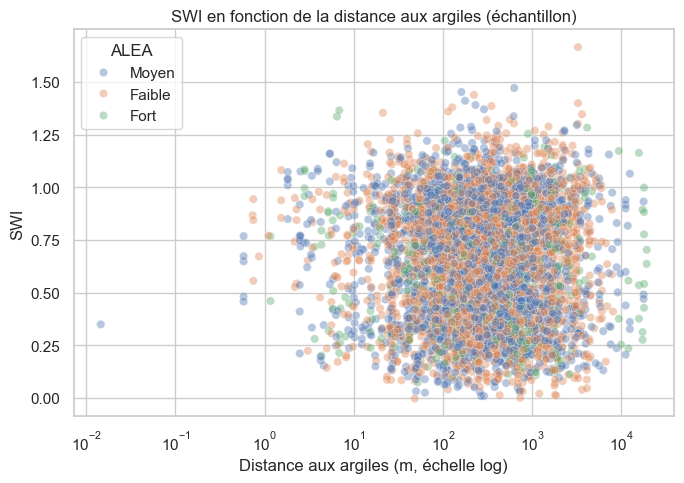

In [ ]:
if "dist_argiles_m" in df.columns:
    sample = df.sample(min(20000, len(df)), random_state=0)

    plt.figure(figsize=(7,5))
    sns.scatterplot(
        data=sample,
        x="dist_argiles_m",
        y="SWI",
        hue="ALEA" if "ALEA" in df.columns else None,
        alpha=0.4
    )
    plt.xscale("log")
    plt.title("SWI en fonction de la distance aux argiles (échantillon)")
    plt.xlabel("Distance aux argiles (m, échelle log)")
    plt.ylabel("SWI")
    plt.tight_layout()
    plt.show()


In [14]:
df["DEPARTEMENT"].unique()

array(['29', '56', '22', '44', '85', '35', '64', '40', '50', '33', '17',
       '49', '53', '14', '79', '61', '65', '32', '16', '72', '47', '24',
       '86', '37', '31', '76', '27', '09', '82', '87', '41', '36', '28',
       '46', '19', '23', '81', '45', '78', '80', '66', '11', '62', '95',
       '60', '12', '18', '91', '15', '92', '59', '03', '75', '94', '93',
       '63', '77', '34', '58', '89', '48', '02', '43', '30', '10', '51',
       '71', '42', '07', '08', '21', '13', '69', '52', '84', '26', '38',
       '01', '55', '39', '70', '88', '54', '05', '04', '73', '25', '83',
       '74', '57', '90', '68', '67', '06', '2A', '2B'], dtype=object)

In [ ]:
df["DEPARTEMENT"] = df["DEPARTEMENT"].astype(str)

# Filtre Bouches-du-Rhône (13)
df13 = df[df["DEPARTEMENT"] == "13"].copy()

print(df13.shape)
print(df13["DEPARTEMENT"].unique())
df13.head()


(584400, 17)
['13']


,LAMBX,LAMBY,DATE,PRENEI,PRELIQ,T,FF,SWI,SSWI_10J,ALEA,NIVEAU,DPT,ARGILES_FROM,dist_argiles_m,COMMUNE,DEPARTEMENT,REGION
1085084,7560,18330,20000101,0.0,0.0,3.9,1.9,0.566,0.071,Moyen,2.0,13,within,NaN,Saintes-Maries-de-la-Mer,13,93
1085085,7560,18330,20000102,0.0,0.2,5.5,3.3,0.564,0.066,Moyen,2.0,13,within,NaN,Saintes-Maries-de-la-Mer,13,93
1085086,7560,18330,20000103,0.0,0.0,5.5,2.6,0.560,0.062,Moyen,2.0,13,within,NaN,Saintes-Maries-de-la-Mer,13,93
1085087,7560,18330,20000104,0.0,0.0,6.8,1.8,0.555,0.058,Moyen,2.0,13,within,NaN,Saintes-Maries-de-la-Mer,13,93
1085088,7560,18330,20000105,0.0,0.1,6.1,2.1,0.553,0.053,Moyen,2.0,13,within,NaN,Saintes-Maries-de-la-Mer,13,93


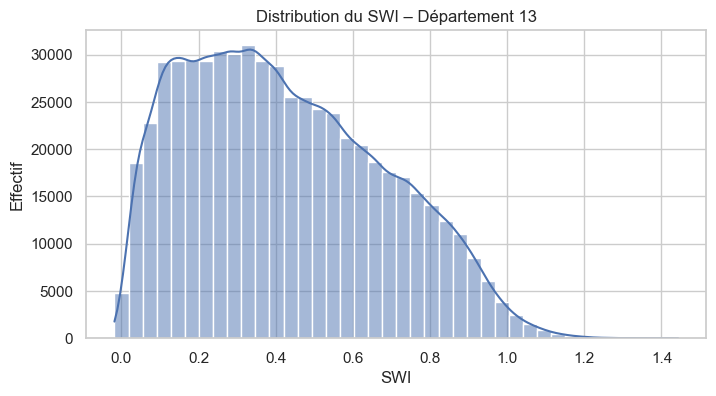

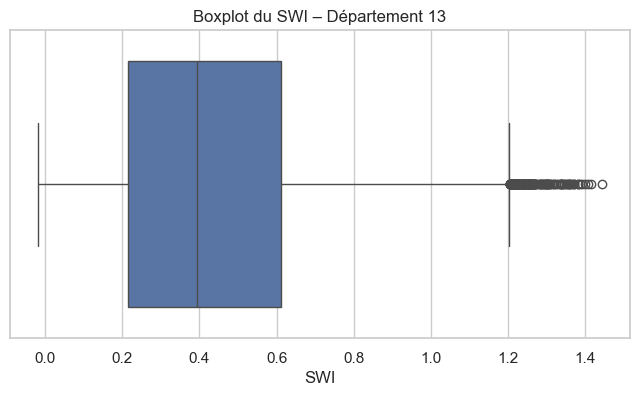

In [16]:
import seaborn as sns
import matplotlib.pyplot as plt

sns.set_theme(style="whitegrid")

plt.figure(figsize=(8,4))
sns.histplot(df13["SWI"], bins=40, kde=True)
plt.title("Distribution du SWI – Département 13")
plt.xlabel("SWI")
plt.ylabel("Effectif")
plt.show()

plt.figure(figsize=(8,4))
sns.boxplot(x=df13["SWI"])
plt.title("Boxplot du SWI – Département 13")
plt.xlabel("SWI")
plt.show()


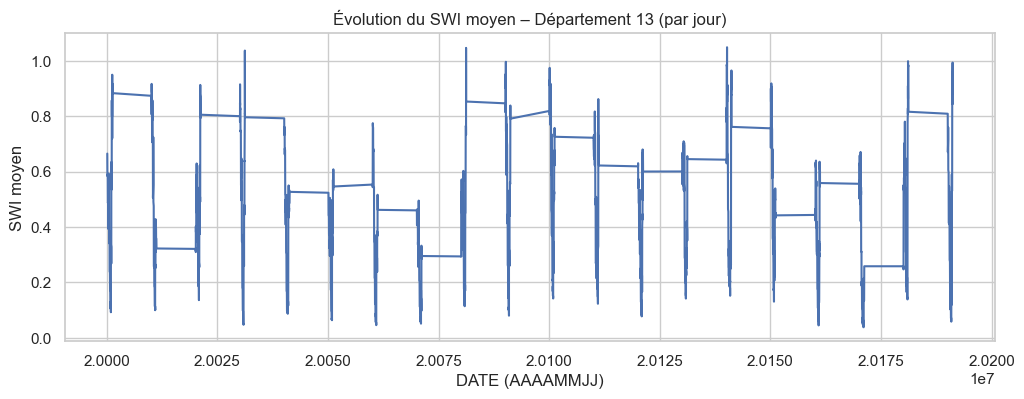

In [17]:
swi_day_13 = (
    df13.groupby("DATE")["SWI"]
        .mean()
        .sort_index()
)

plt.figure(figsize=(12,4))
swi_day_13.plot()
plt.title("Évolution du SWI moyen – Département 13 (par jour)")
plt.ylabel("SWI moyen")
plt.xlabel("DATE (AAAAMMJJ)")
plt.show()


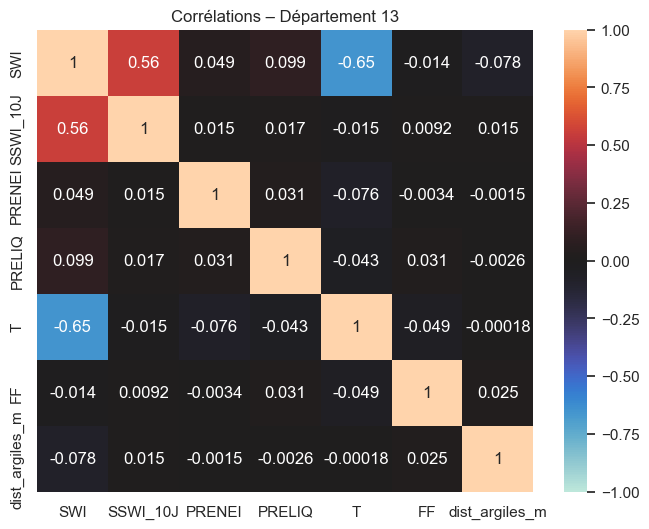

SWI               1.000000
SSWI_10J          0.560612
PRELIQ            0.098567
PRENEI            0.048801
FF               -0.014392
dist_argiles_m   -0.078462
T                -0.649170
Name: SWI, dtype: float64

In [18]:
num_cols = [
    "SWI", "SSWI_10J",
    "PRENEI", "PRELIQ",
    "T", "FF",
    "dist_argiles_m"
]
num_cols = [c for c in num_cols if c in df13.columns]

corr13 = df13[num_cols].corr()

plt.figure(figsize=(8,6))
sns.heatmap(corr13, annot=True, vmin=-1, vmax=1, center=0)
plt.title("Corrélations – Département 13")
plt.show()

corr13["SWI"].sort_values(ascending=False)


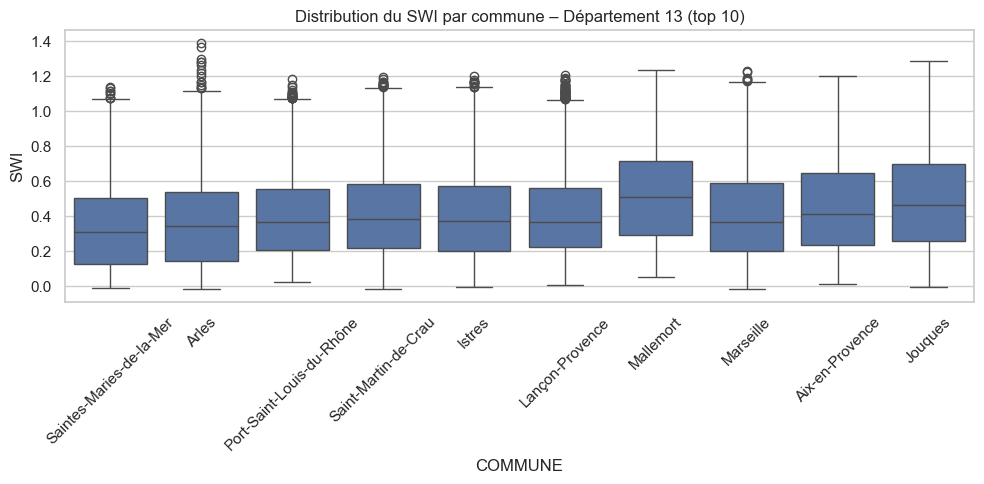

In [19]:
swi_commune_13 = (
    df13.groupby("COMMUNE")["SWI"]
        .agg(["mean", "median", "std", "count"])
        .sort_values("mean", ascending=False)
)

swi_commune_13.head(15)


top_communes_13 = df13["COMMUNE"].value_counts().head(10).index
df13_topcomm = df13[df13["COMMUNE"].isin(top_communes_13)]

plt.figure(figsize=(10,5))
sns.boxplot(data=df13_topcomm, x="COMMUNE", y="SWI")
plt.title("Distribution du SWI par commune – Département 13 (top 10)")
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()


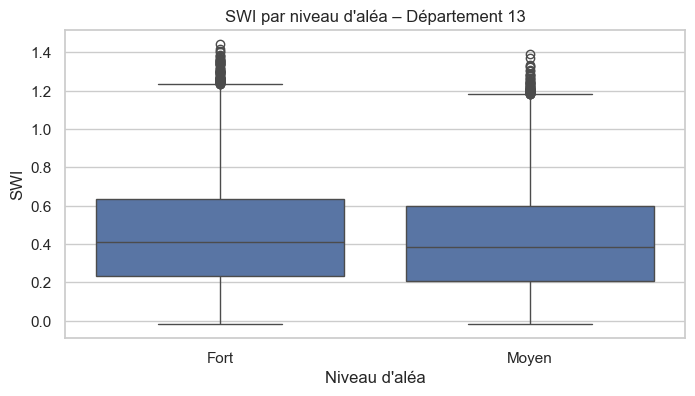

In [20]:
if "ALEA" in df13.columns:
    plt.figure(figsize=(8,4))
    sns.boxplot(data=df13, x="ALEA", y="SWI",
                order=sorted(df13["ALEA"].dropna().unique()))
    plt.title("SWI par niveau d'aléa – Département 13")
    plt.xlabel("Niveau d'aléa")
    plt.ylabel("SWI")
    plt.show()

    df13.groupby("ALEA")["SWI"].describe()


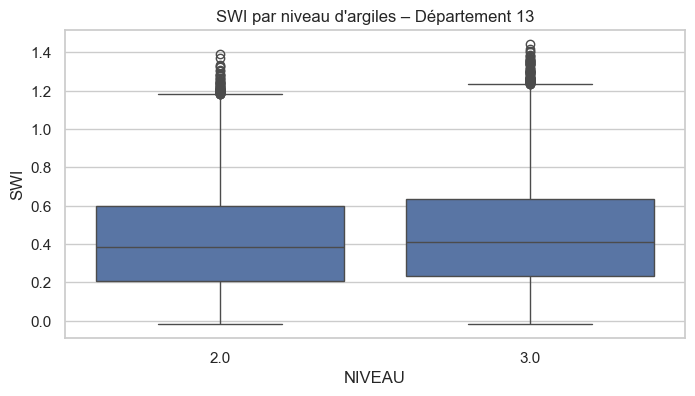

In [21]:
# SWI par NIVEAU d'argiles
if "NIVEAU" in df13.columns:
    plt.figure(figsize=(8,4))
    sns.boxplot(data=df13, x="NIVEAU", y="SWI")
    plt.title("SWI par niveau d'argiles – Département 13")
    plt.xlabel("NIVEAU")
    plt.ylabel("SWI")
    plt.show()

    df13.groupby("NIVEAU")["SWI"].describe()


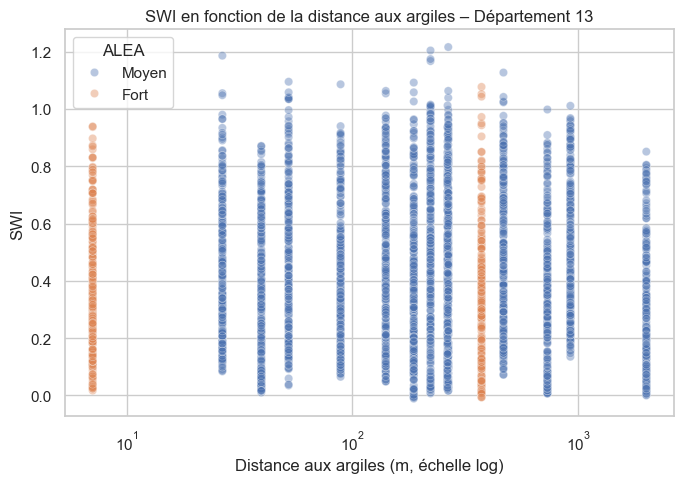

In [22]:
# Relation SWI – distance aux argiles (échantillon)
if "dist_argiles_m" in df13.columns:
    sample13 = df13.sample(min(20000, len(df13)), random_state=0)

    plt.figure(figsize=(7,5))
    sns.scatterplot(
        data=sample13,
        x="dist_argiles_m",
        y="SWI",
        hue="ALEA" if "ALEA" in df13.columns else None,
        alpha=0.4
    )
    plt.xscale("log")
    plt.title("SWI en fonction de la distance aux argiles – Département 13")
    plt.xlabel("Distance aux argiles (m, échelle log)")
    plt.ylabel("SWI")
    plt.tight_layout()
    plt.show()


In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score, mean_squared_error



# --- Variables explicatives SANS dist_argiles_m ---
num_cols = ["PRENEI", "PRELIQ", "T", "FF", "SSWI_10J"]   # <-- dist_argiles_m retirée
num_cols = [c for c in num_cols if c in df13.columns]

cat_cols = []
if "ALEA" in df13.columns:
    cat_cols.append("ALEA")
if "NIVEAU" in df13.columns:
    cat_cols.append("NIVEAU")

print("Numériques :", num_cols)
print("Catégorielles :", cat_cols)

cols_needed = ["SWI"] + num_cols + cat_cols
df13_model = df13[cols_needed].dropna().copy()
print("Taille après dropna :", df13_model.shape)

# Dummies pour les variables catégorielles
X = pd.get_dummies(df13_model[num_cols + cat_cols], drop_first=True)
y = df13_model["SWI"]

Numériques : ['PRENEI', 'PRELIQ', 'T', 'FF', 'SSWI_10J']
Catégorielles : ['ALEA', 'NIVEAU']
Taille après dropna : (584400, 8)


In [24]:
# Split train/test
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=0
)

# Modèle linéaire
linreg = LinearRegression()
linreg.fit(X_train, y_train)

y_pred = linreg.predict(X_test)

r2 = r2_score(y_test, y_pred)
rmse = np.sqrt(mean_squared_error(y_test, y_pred))
print(f"R² (test)  : {r2:.3f}")
print(f"RMSE (test): {rmse:.3f}")

R² (test)  : 0.733
RMSE (test): 0.131


In [25]:
# Coefficients
coef_df = pd.DataFrame({
    "variable": X.columns,
    "coefficient": linreg.coef_,
}).sort_values("coefficient", ascending=False)

coef_df

,variable,coefficient
4,SSWI_10J,0.158658
5,NIVEAU,0.010498
1,PRELIQ,0.002555
3,FF,-0.005126
0,PRENEI,-0.006148
6,ALEA_Moyen,-0.010498
2,T,-0.023080


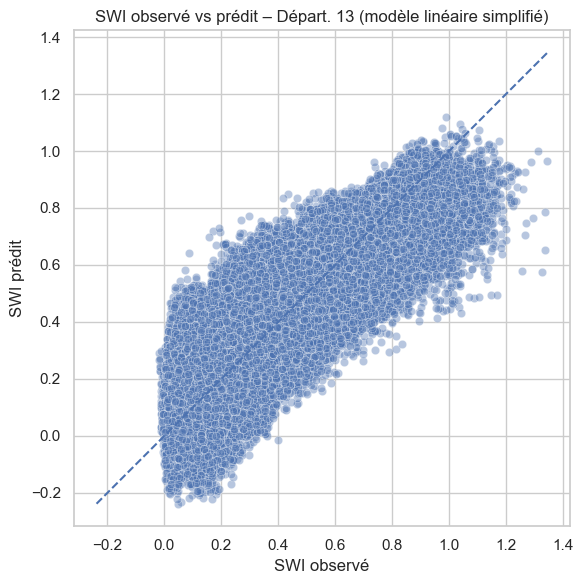

In [26]:
import seaborn as sns
import matplotlib.pyplot as plt

plt.figure(figsize=(6,6))
sns.scatterplot(x=y_test, y=y_pred, alpha=0.4)
min_val = min(y_test.min(), y_pred.min())
max_val = max(y_test.max(), y_pred.max())
plt.plot([min_val, max_val], [min_val, max_val], linestyle="--")
plt.xlabel("SWI observé")
plt.ylabel("SWI prédit")
plt.title("SWI observé vs prédit – Départ. 13 (modèle linéaire simplifié)")
plt.tight_layout()
plt.show()


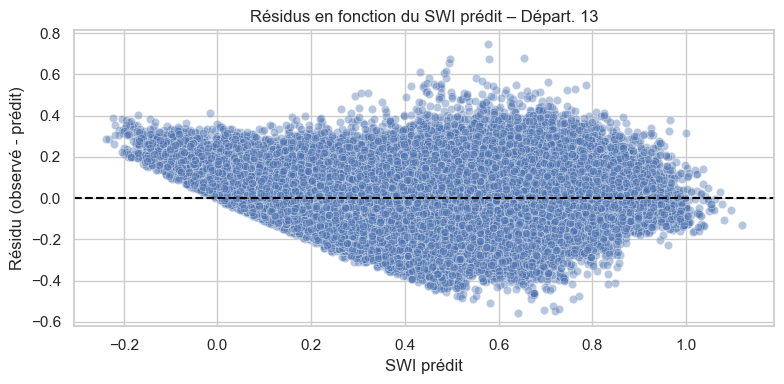

In [27]:
residuals = y_test - y_pred

plt.figure(figsize=(8,4))
sns.scatterplot(x=y_pred, y=residuals, alpha=0.4)
plt.axhline(0, color="black", linestyle="--")
plt.xlabel("SWI prédit")
plt.ylabel("Résidu (observé - prédit)")
plt.title("Résidus en fonction du SWI prédit – Départ. 13")
plt.tight_layout()
plt.show()


In [ ]:
from pathlib import Path
import pandas as pd

# ==========================================
# 1) Chemins
# ==========================================
ROOT = Path.cwd()
if ROOT.name == "src":          
    ROOT = ROOT.parent

DB = ROOT / "data" / "database"
print("Dossier database :", DB)

base_path = next(DB.glob("swi_filtre_concat_geo_clean*.parquet"))
print("Base utilisée :", base_path.name)

# ==========================================
# 2) Charger la base complète
# ==========================================
df = pd.read_parquet(base_path)

# S'assurer que DEPARTEMENT est bien une string
df["DEPARTEMENT"] = df["DEPARTEMENT"].astype(str)

# ==========================================
# 3) Filtrer le département 13 -> df13
# ==========================================
df13 = df[df["DEPARTEMENT"] == "13"].copy()
print("Shape df13 :", df13.shape)
print("Départements présents dans df13 :", df13["DEPARTEMENT"].unique())

# ==========================================
# 4) Enregistrer df13 dans data/database
# ==========================================
output_path = DB / "df13.parquet"
df13.to_parquet(output_path, index=False)

print("✔ df13 enregistré dans :", output_path)


Dossier database : /Users/larbi/Documents/PROJET-ML-FOR-CLIMATE-RISK/data/database
Base utilisée : swi_filtre_concat_geo_clean.parquet
Shape df13 : (584400, 17)
Départements présents dans df13 : ['13']
✔ df13 enregistré dans : /Users/larbi/Documents/PROJET-ML-FOR-CLIMATE-RISK/data/database/df13.parquet
